****Loaded worldOverweight_prepped.csv for analysis**** 

****A. How much of the world is overweight overall?****

The table below shows basic weight statistics for the world
                         Statistic          Value
0              Number of countries            183
1                 World Population  7,484,310,244
2      Number of overweight people  2,799,326,793
3  Number of not overweight people  4,684,983,451
4    Percent overweight world-wide          37.40

The histogram below shows the distribution of % overweight for the world


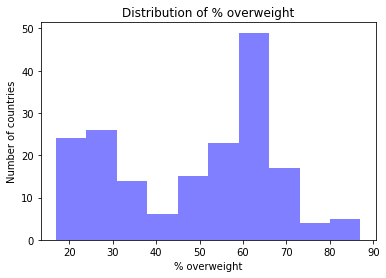

****B. What are the top 10 and bottom 10 most overweight countries?****

The table below shows the top 10 most overweight countries in the world
              Country  Percent Overweight
111             Nauru                  87
123             Palau                  84
34       Cook Islands                  83
99   Marshall Islands                  82
169            Tuvalu                  81
118              Niue                  79
82           Kiribati                  78
164             Tonga                  75
137             Samoa                  75
83             Kuwait                  72
Naru has the highest overweight rate at 87%

The table below shows the bottom 10 most overweight countries in the world
         Country  Percent Overweight
162        Timor                  17
179      Vietnam                  18
51      Ethiopia                  18
0    Afghanistan                  19
49       Eritrea                  19
70         India                  19
28          Ch

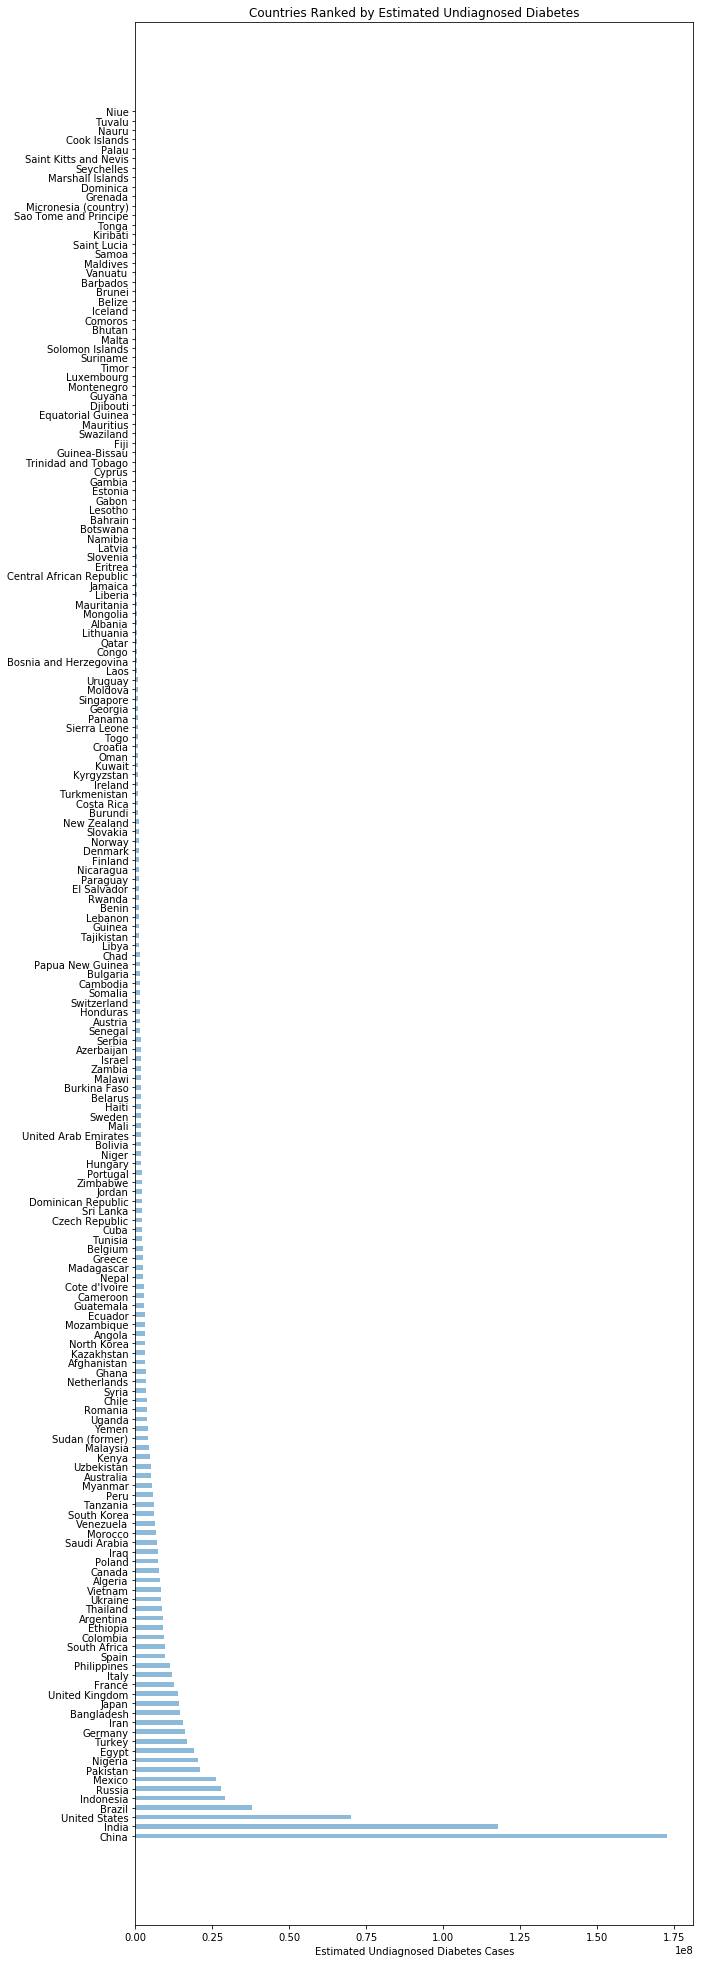

***For your reference, we saved the full results table as worldOverweight_fullResults.csv
It has these columns:
Index(['Country', 'Population', 'Percent Overweight', 'Number Overweight',
       'Number Not Overweight', 'Diagnoses in Overweight People',
       'Diagnoses in Not Overweight People', 'Total Diagnoses',
       'Estimated Undiagnosed Diabetes',
       'Percent of Population with Undiagnosed Diabetes'],
      dtype='object')
***Saved the full results table as worldOverweight_fullResults.csv

                   Country  Population  Percent Overweight  Number Overweight  \
30                   China  1415045928                  33       4.669652e+08   
70                   India  1354051854                  19       2.572699e+08   
174          United States   326766748                  70       2.287367e+08   
19                  Brazil   210867954                  56       1.180861e+08   
71               Indonesia   266794980                  28       7.470259e+07   
133    

In [90]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

print("****Loaded worldOverweight_prepped.csv for analysis**** ")
worldOverweight = pd.read_csv('worldOverweight_prepped.csv')
print()
print("****A. How much of the world is overweight overall?****")
print()
print("The table below shows basic weight statistics for the world")
worldOverweight['Number Overweight'] = worldOverweight['Population'] * (worldOverweight['Percent Overweight'] / 100)
worldOverweight['Number Not Overweight'] = worldOverweight['Population'] - worldOverweight['Number Overweight']
numCountries = worldOverweight['Country'].count()
worldPop = worldOverweight['Population'].sum()
numOverweight =  worldOverweight['Number Overweight'].sum()
numNotOverweight =  worldOverweight['Number Not Overweight'].sum()
percentOverweight = (numOverweight / worldPop) * 100 

basicStatsDict = {
    'Statistic': ["Number of countries",
                  "World Population", 
                  "Number of overweight people",  
                  "Number of not overweight people",
                  "Percent overweight world-wide"
                 ],
    'Value': ["{0:,.0f}".format(numCountries), 
              "{0:,.0f}".format(worldPop), 
              "{0:,.0f}".format(numOverweight), 
              "{0:,.0f}".format(numNotOverweight),
              "{0:,.2f}".format(percentOverweight)
            ]}

basicStatsTable = pd.DataFrame.from_dict(basicStatsDict)
print(basicStatsTable)
print()
print("The histogram below shows the distribution of % overweight for the world")

num_bins = 10
n, bins, patches = plt.hist(worldOverweight["Percent Overweight"], num_bins, facecolor='blue', alpha=0.5)
plt.title('Distribution of % overweight')
plt.xlabel("% overweight")
plt.ylabel("Number of countries")
plt.show()

print("****B. What are the top 10 and bottom 10 most overweight countries?****")
print()
print("The table below shows the top 10 most overweight countries in the world")
countryPercent = worldOverweight.filter(["Country", "Percent Overweight"])
countryPercent = countryPercent.sort_values(by="Percent Overweight",ascending=False )
print(countryPercent.head(10))
print("Naru has the highest overweight rate at 87%")
print()
print("The table below shows the bottom 10 most overweight countries in the world")
countryPercentLow = worldOverweight.filter(["Country", "Percent Overweight"])
countryPercentLow = countryPercentLow.sort_values(by="Percent Overweight",ascending=True )
print(countryPercentLow.head(10))
print("Timor has the lowest overweight rate at 17%")
print()

                                                                                    
worldOverweight['Diagnoses in Overweight People'] = worldOverweight['Number Overweight'] * .724
worldOverweight['Diagnoses in Not Overweight People'] = worldOverweight['Number Not Overweight'] * .099
worldOverweight['Total Diagnoses'] = worldOverweight['Diagnoses in Overweight People'] + worldOverweight["Diagnoses in Not Overweight People"]
worldOverweight['Estimated Undiagnosed Diabetes'] = worldOverweight['Total Diagnoses'] * 0.40
worldOverweight['Percent of Population with Undiagnosed Diabetes'] = (worldOverweight['Estimated Undiagnosed Diabetes'] / worldOverweight["Population"]) * 100

print("****C. How many diagnosed and undiagnosed cases of diabetes should we expect overall?****")
print()
print("Our assumptions")
print()
overweightRate = 0.724
notOverweightRate = 0.099
undiagnosed =  0.400

statsDict = {
    'Statistic': ["Overweight people diabetes rate",
                  "Not overweight person diabetes rate", 
                  "Percent of undiagnosed diabetes cases"
                 ],
    'Value': [overweightRate, 
              notOverweightRate,
              undiagnosed
            ]}

statsTable = pd.DataFrame.from_dict(statsDict)
print(statsTable)
print()
print("Overweight people are 7 times more likely to get diabetes")
print()
print("To simulate the number of undiagnosed cases of diabetes in each country, we:")
print("1. Simulated the number of diagnosed diabetes cases in overweight people in each country")
print("2. Simulated the number of diagnosed diabetes cases in NOT overweight people in each country")
print("3. Totaled the diagnosed cases in each country")
print("4. Multiplied this total by the percent of cases that are not diagnosed (0.4) to find the number of undiagnosed cases in each country")
print()
print("To estimate the number of undiagnosed cases world-wide we:")
print("1. Summerd the diagnosed cases in each country")
print("2. Multiplied this total by the percent of cases that are not diagnosed")
print()
print("Because simulating across all of the people in the world would take too long, we sampled (multiplied by) all populations by 0.0001 before doing the simulation and then extrapolated (divided by) 0.0001 after.")
print()
print("Results")

overweightDiagnoses = numOverweight * overweightRate
notOverweightDiagnoses = numNotOverweight * notOverweightRate
totalDiagnoses =  overweightDiagnoses + notOverweightDiagnoses
undiagnosedDiabetes = 990600000

worldStatsDict = {
    'Statistic': ["Overweight diabetes diagnoses world-wide",
                  "Not overweight diabetes diagnoses world-wide", 
                  "Total diabetes diagnoses world-wide",
                  "Undiagnosed diabetes cases world-wide"
                 ],
    'Value': ["{0:,.0f}".format(overweightDiagnoses), 
              "{0:,.0f}".format(notOverweightDiagnoses),
              "{0:,.0f}".format(totalDiagnoses),
              "{0:,.0f}".format(undiagnosedDiabetes)
            ]}

worldStatsTable = pd.DataFrame.from_dict(worldStatsDict)
print(worldStatsTable)
print()
print("How our simulation compares to the theoretical number")

theoreticalUndiagnosedCases = 996210384
ourValue = undiagnosedDiabetes
difference =  theoreticalUndiagnosedCases - ourValue
percentDifference = difference/theoreticalUndiagnosedCases * 100

theoryStatsDict = {
    'Statistic': ["Theoretical number of undiagnosed cases",
                  "Our value", 
                  "Difference (theoretical - ours)",
                  "Percent difference (diff/theoretical) X 100)"
                 ],
    'Value': ["{0:,.0f}".format(theoreticalUndiagnosedCases), 
              "{0:,.0f}".format(ourValue),
              "{0:,.0f}".format(difference),
              percentDifference
            ]}

theoryStatsTable = pd.DataFrame.from_dict(theoryStatsDict)
print(theoryStatsTable)
print()
print("****How many people should we expect in each country to have undiagnosed diabetes?****")
print()

worldOverweight = worldOverweight.sort_values(by=['Estimated Undiagnosed Diabetes'], ascending=[False])
plt.figure(figsize=(10,40))
plt.barh(worldOverweight['Country'], worldOverweight['Estimated Undiagnosed Diabetes'],.5,  align='center', alpha=0.5,)
plt.title('Countries Ranked by Estimated Undiagnosed Diabetes')
plt.xlabel("Estimated Undiagnosed Diabetes Cases")
plt.show()

print("***For your reference, we saved the full results table as worldOverweight_fullResults.csv")
print("It has these columns:")
print(worldOverweight.columns)
fullResultsFileName = "worldOverweight_fullResults.csv"
print("***Saved the full results table as {}".format(fullResultsFileName))    
worldOverweight.to_csv(fullResultsFileName, index=False)

print()
print(worldOverweight)